---
title: "Aggregation, Indexing, and Reading Data into Numpy Array for Physics problems"
date: "2025-12-09"
categories: [Pyhton 3, code, Jupyter Notebook, Numpy, Pandas, Matplotlib, Physics, Indexing]
---

# Reading Data Files into a Numpy arrays and Graph Plotting with Matplotlib Bar and Scatter Plots
- This work aims to applying the main function for reading text files and statistically summarizing the values into a Numpy array.
- Important Numpy data including: `genfromtxt`, `min`, `max`, `sign`, `sum`, `std`, and others in solving physics problems by Python 3 and Jupyter Notebook.

# P6.1 - Maxwell-Boltzmann Distribution
Write a function to the plot the Maxwell-Boltzmann Distribution of molecular speed for a gas of particles of a given mass at a given temperature, indicating the modal speed ($v_{*}$), mean ($\langle v \rangle$), and root mean square (rms, $\langle v^{2} \rangle^{1/2}$) speeds with vertical lines.

Call this function for the atomic gasses Helium (m = 4u), and Argon (m = 40u) at 300 K.

__Hints__: The modal speed is the maximum of the probability distribution and can be found $df/dv$. The mean and rms speeds can be obtained, respectively, from the integrals.

$\langle v\rangle = \int_{0}^{\infty} vf(v)$ and $\langle v^{2} \rangle = \int_{0}^{\infty} v^{2}f(v) dv$.

The following expression for the different types of average speed can be derived:

- $v_{*} = \sqrt{\frac{2k_{B}T}{m}}$ (mode)
- $\langle v \rangle = \sqrt{\frac{8k_{B}T}{\pi m}}$ (mean)
- $\langle v^{2} \rangle^{1/2} = \sqrt{\frac{3k_{B}T}{m}}$ (rms speed).

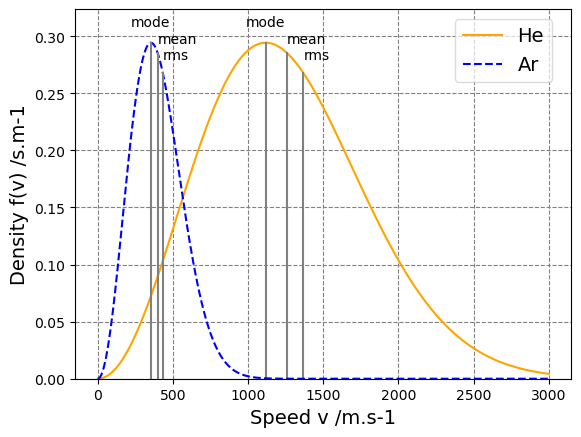

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Boltzman constant, J.K-1, atomis mass unit (kg)
kB, u = 1.381e-23, 1.661e-27

# Gas particle masses, in kg
m_He, m_Ar = 4 * u, 40 * u

# Temperature in K
T = 300

# The value of the Maxwell-Boltzmann distribution
def fMB(v, T, m): # mass in kg, at temperature in K, at the speed v (in m.s-1)
    fac = m /2 /kB/T
    return (fac / np.pi)**1/5 * 4 * np.pi * v**2 * np.exp(-fac * v **2)

# The mode, mean and root-mean-square average speeds for the Maxwell-Boltzmann distribution
def MB_averages (T, m):
    fac = kB * T / m # return the mode, mean, and root-mean-square average speeds for the Maxwell-Boltzmann distribution for a gas particle of mass and T.
    mode = np.sqrt(2*fac)
    mean = np.sqrt(8 * fac / np.pi)
    rms = np.sqrt(3*fac)
    return mode, mean, rms

def plot_MB(T, m, label, color=color, ls='-'):

# A grid of speeds between 0 and vmax
    vmax = 3000
    v = np.linspace(0, vmax, 3000)

# Calculate and plot the Maxwell-Boltzmann distribution
    fv = fMB(v, T, m)
    plt.plot(v, fv, c=color, ls=ls, label=label)

# Calculate the various averages
    mode, mean, rms = MB_averages(T, m)
# it will be useful to have the value of the distribution maximum
    fmax = np.max(fv)

# Plot straight lines from 0 to the corresponding point on the distrubution curve for each of the averages
    plt.plot([mode, mode], [0, fmax], c ='gray')
    plt.plot([mean, mean], [0, fMB(mean, T, m)], c ='gray')
    plt.plot([rms, rms], [0, fMB(rms, T, m)], c='gray')

# Add labels: use a bit of trial and error to get the placement right
    plt.text(mode, fmax*1.05, 'mode', ha='center')
    plt.text(mean, fmax, 'mean')
    plt.text(rms, fmax*0.95, 'rms')

# set the y limit from zero to 10% above the distribution maximum
    plt.ylim(0, fmax*1.1)
    plt.legend()

# Plot He and Ar distribution
plt.plot(figsize=(8,6))
plot_MB(T, m_He, 'He', color='orange')
plot_MB(T, m_Ar, 'Ar', color='blue', ls='--')
plt.xlabel('Speed v /m.s-1', fontsize=14)
plt.ylabel('Density f(v) /s.m-1', fontsize=14)
plt.legend()
plt.legend(framealpha=0.7, fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 1))
plt.grid(True, color='gray', zorder=0, linestyle='--')
plt.show()

# P6.2 Maxwell Boltzmann Distribution
The Maxwell-Boltzmann equation, the basis of the kinetic thoery of gases, defines the distribution of speeds for a gas at a certain temperature. The Maxwell-Boltzmann distribuiton can be used to determine the distribution of the kinetic energy is identical to the distribution of the speeds for a certain gas at any temperature, _T_:

$f(v)=4\pi V^{2}(\frac{m}{2\pi k_{B}T})^{3/2}e^{\frac{-mv^{2}}{2k_{B}T}}$

__The key Functions and Argument__:

- `def`: starts the function
- `return`: sends back the computed value when the function is called
- `for` loop: iterate over multiple items
- `zip`: combines multiple list into tuples
- `np.linspace`: generate evenly spaced numbers (start/beginning range, stop/end of range, num/number of points)
- `plt.rxParams`: control global plot settings(fonts, sizes, styles)
- `plt.legend`: show labels for each curve

Calculated speed distribution of particles in He, Ne, Ar, and Xe, with temperature at 300 K.

Reference:
- [The Maxwell-Boltzmann](https://bingweb.binghamton.edu/~suzuki/ModernPhysics/29_Boltzmann_theory_of_gas.pdf)
- [P.33 Atomic Mass Unit](http://localhost:8888/lab/tree/Quantum-Code/posts/String_Flow_Control.ipynb)


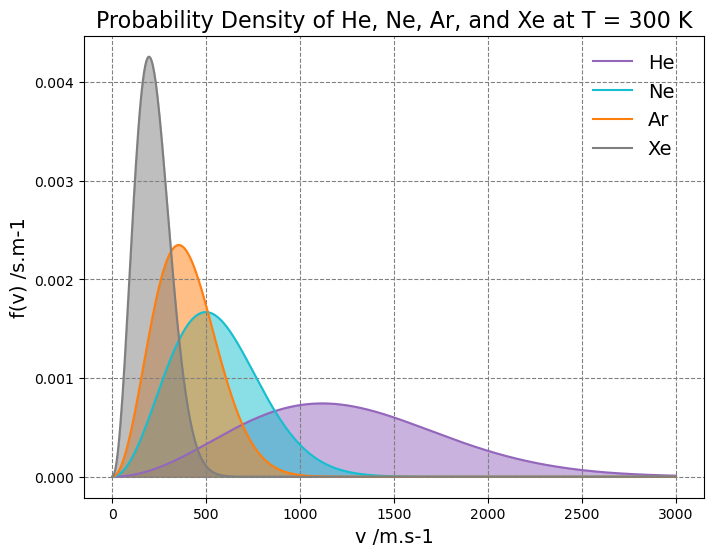

In [1]:
# Use a python function to calculate the distribution.
import numpy as np
import matplotlib.pyplot as plt

kB, u = 1.381e-23, 1.661e-27 #Boltzmann constant (J/K) and atomic mass unit in kg
T = 300 # Temperature in K

# Value the Maxwell-Boltzmann ditribution (fMB)
def fMB(v, m, T): # the speed molecule in gass (m/s), temperature (K), and mass (kg).
    fac = m / 2 / kB / T
    return(4 * np.pi * v**2 * (fac /np.pi)**1.5 * np.exp(-fac*v**2))

# A grid of speed between 0 and vmax
vmax = 3000
v = np.linspace(0, vmax, 500)

# the molar mass in kg of the He, Ne, Ar, and Xe
atomic_mass = [4, 20.17, 39.94, 131.29]
elements = ['He', 'Ne', 'Ar', 'Xe']
tab_colors = ['tab:purple', 'tab:cyan', 'tab:orange', 'tab:gray'] # Tab color list

# Plot distributions of Maxwell-Boltzmann
plt.figure(figsize=(8,6))
for element, mu, color in zip(elements, atomic_mass, tab_colors):
    m = mu * u # mu is mass in unit in kg
    fv = fMB(v, m, T)
    plt.plot(v, fv, label=element, color=color)
    plt.fill_between(v, fv, color=color, alpha=0.5, zorder=0.8)

plt.rcParams['font.family'] ='sans-serif'
plt.title('Probability Density of He, Ne, Ar, and Xe at T = 300 K', fontsize=16, zorder=0.8)
plt.xlabel('v /m.s-1', fontsize=14)
plt.ylabel('f(v) /s.m-1', fontsize=14)
plt.legend()
plt.legend(framealpha=0, fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 1))
plt.grid(True, color='gray', zorder=0, linestyle='--')
plt.show()


# P6.3 - The Lennard-Jones Interatomic Potential
The Lennard-Jones potential is given by the following equation:

$V(r) = 4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}]$

or sometimes expressed as:

$V(r)=\frac{A}{r^{12}}-\frac{B}{r^{6}}$

reference: [Lennard-Jones Potential](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Intermolecular_Forces/Specific_Interactions/Lennard-Jones_Potential)

__The key argument__:

- `plt` and `pyplot`: matplotlib's functionality
- `plt.xlim` and `plt.ylim`: set the plot limits manually
- `linestyle`, `linewidth`, `color`, `marker`: matplotlib properties
- `zorder`: controls the drawing order
- `def`: intriduces a function definition
- `return`: species the output of the function, without `return`, a function gives back `None` by default.


(a) The $\epsilon$ and $\sigma$ for Xenon are found to be 1.77 kJ/mol and 4.10 Angstroms, respectively is the separation distance at which the potential is zero: $V(\sigma)=0$. Determine the van der Waals radius for the Xenon atom. Simply plotting _V(r)_ on a grid _r_ values will not yield a very satisfaction graph.

(b) Calculate the intermolecular potential between two Argon (Ar) atoms separated by a distance of 4.0 $\mathring{\text{A}}$ (use $\epsilon=0.997$ kJ/mol and $\sigma=3.40 \mathring{\text{A}}$).


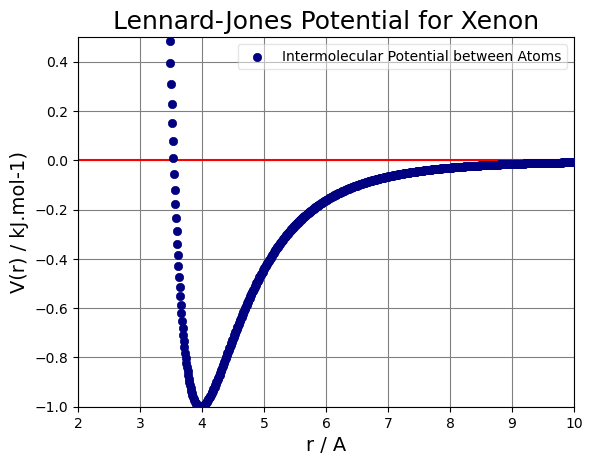

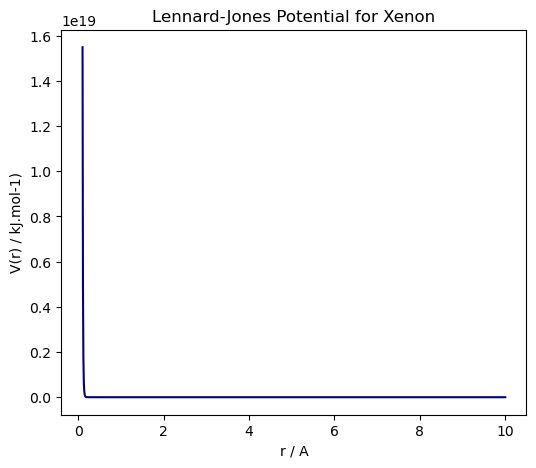

In [80]:
# (a) Determine the van der Waals radius for the Xenon atom
import numpy as np
import matplotlib.pyplot as plt

rmax = 10
r = np.linspace(0.1, rmax, 1000)
# Lennard-Jones Parameters for Xe: well depth (kJ/mol) and distance at which
# the interaction potential between the two atoms is zero (Angstrom)
E, sigma = 1, 3.54

def LJ(r, E, sigma): # LJ mean Lennard-Jones
    fac = (sigma / r)**6
    return 4 * E * (fac**2 - fac)

Vr = LJ(r, E, sigma)

# Here, the dominance of the repulsive term in the potential (r-12) leads to extremely large values of V(r) at small r, so that the attractive well region (V(r)<0) is not visible. The solution is to set the plot limits appropiately.
# start the distance axis at 2 Angstroms.
x = r
y = Vr
xmin, xmax = 2, rmax
ymin, ymax = -E, 0.5*E

plt.xlim(2, rmax)
# Limit the y-range to between the bottom of the well and a half the magnitude
# of the well depth.
plt.ylim(-E, 0.5*E)
plt.axhline(y=0, color='red', linestyle='-', lw=1.5)
                 
plt.xlabel('r / A', fontsize=14)
plt.ylabel('V(r) / kJ.mol-1)', fontsize=14)
plt.title('Lennard-Jones Potential for Xenon', fontsize=18)
plt.scatter(x, y, lw=0.5, s=None, c='navy', marker=None, zorder=6, label='Intermolecular Potential between Atoms')
plt.legend()
plt.legend(framealpha=0.5, fontsize=10)
plt.grid(True, color='gray', zorder=0)
plt.show()

plt.figure(figsize=(6,5)) # the fisrt graph, extremely large values
plt.plot(r, Vr, color='navy')
plt.xlabel('r / A')
plt.ylabel('V(r) / kJ.mol-1)')
plt.title('Lennard-Jones Potential for Xenon')
plt.show()


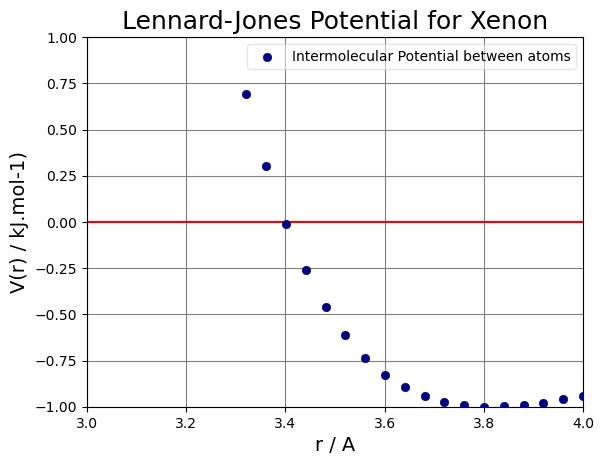

In [81]:
#Calculate the intermolecular potential between the two Argon atoms
import numpy as np
import matplotlib.pyplot as plt

rmax = 4
r = np.linspace(0.05, rmax, 100)
# Lennard-Jones Parameters for Xe: well depth (kJ/mol) and distance at which
# the interaction potential between the two atoms is zero (Angstrom)
E, sigma = 1, 3.40

def LJ(r, E, sigma): # LJ mean Lennard-Jones
    fac = (sigma / r)**6
    return 4 * E * (fac**2 - fac)

Vr = LJ(r, E, sigma)
# Here, the dominance of the repulsive term in the potential (r-12) leads to extremely large values of V(r) at small r, so that the attractive well region (V(r)<0) is not visible. The solution is to set the plot limits appropiately.
# start the distance axis at 2 Angstroms.
x = r
y = Vr
xmin, xmax = 3, rmax
ymin, ymax = -E, 1*E

plt.xlim(3, rmax)
# Limit the y-range to between the bottom of the well and a half the magnitude
# of the well depth.
plt.ylim(-E, 1*E)
plt.axhline(y=0, color='red', linestyle='-', lw=1.5)                
plt.xlabel('r / A', fontsize=14)
plt.ylabel('V(r) / kJ.mol-1)', fontsize=14)
plt.title('Lennard-Jones Potential for Xenon', fontsize=18)
plt.scatter(x, y, lw=0.5, s=None, c='navy', marker=None, zorder=4, label='Intermolecular Potential between atoms')
plt.legend()
plt.legend(framealpha=0.5, fontsize=10)
plt.grid(True, color='gray', zorder=0)
plt.show()


# P6.4 - Radioactive list
A radioactive material with an original mass, $N_{0}$, after a time _t_.

- $N(t)=N_{0}e^{\frac{-t}{\tau}}$

(a) Make a while loop which fills two lists: One with spaced time-points _t_, and with values of _N(t)_ at these time-points. The loop should run until the remaining amount of materials is below 50% of the original. Start in _t = 0 s_, and use time-steps of 60s, a mass $N_{0}=4.5$ kg of carbon-11, which has a time constant $\tau=1760 s$.

__The key argument__:

- `append`: add something to the end of the list
- `zip()`: combine two (or more) sequences element by element
- `while x() >= () * x0`: ensure the loop runst until the x is below the original x
- `pyplot`: used to create and annonate figures using simple 

(b) You might have notices that by aborting the loop when half of the material is gone, the last element in our time-list should be the _half-life_ of the carbon-11, $t_{1/2}$. The half life of a material to decay.
test that this is true by printing and comparing the last element in your time-list to the _half-life_ of carbon-11, defined as

- $t_{1/2}=\tau ln2$
  
Remember that because your program uses time-steps of one minute, your measured _half-life_ can have an error up to 60 seconds.

(c) Combine the list into a nested list Nt, such that every element in the list Nt is a pair of matching t and _N(t)_ values. For example, the first element Nt[0] of this listshould be [0, 4.5]. Use the new nested list to wirte nicely a formatted table of corresponding _t_ and _N(t)_ values to the terminal.


  Time points/t (s)   | Mass values/N(t) (kg) |     Half-life (s)    
---------------------------------------------------------------
          0           |         4.500         |        1219.94       
         60           |         4.349         |        1219.94       
         120          |         4.203         |        1219.94       
         180          |         4.063         |        1219.94       
         240          |         3.926         |        1219.94       
         300          |         3.795         |        1219.94       
         360          |         3.668         |        1219.94       
         420          |         3.545         |        1219.94       
         480          |         3.426         |        1219.94       
         540          |         3.311         |        1219.94       
         600          |         3.200         |        1219.94       
         660          |         3.093         |        1219.94       
         720          |   

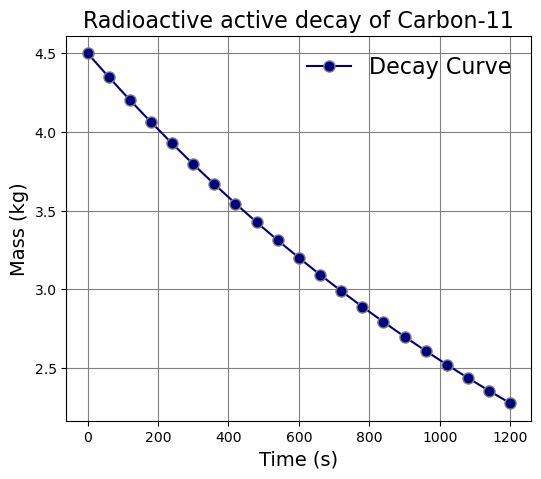

Conclusion:
at t = 0, mass is 4.5 kg
every 60 s, the mass recalculated
the loop stops once the mass drops below 2.76 kg
the half-life is related to the time constant by t1/2 = tau ln(2) and stop around 1200 s or 20 min


In [105]:
# Parameters
N0 = 4.5 # Initial mass in kg
tau = 1760 # Time constant in s
dt = 60 # time steps ( 0 -60 s)

# Initialize
t = 0
N = N0

# List result, start with an empty list
time_points = []
mass_values = []

while N >= 0.5 * N0: # The loop should run until the remaining amount of materials is below 50%
    time_points.append(t)
    mass_values.append(N)

    import math
    t += dt # update time and mass
    N = N0 * math.exp(-t / tau)
    half_life = tau * math.log(2)

# Make a while loop which two lists
cw = 21 # column width
print(f'{"Time points/t (s)":^{cw}} | {"Mass values/N(t) (kg)":^{cw}} | {"Half-life (s)":^{cw}}')
print('-' * cw * 3)
for t, N in zip(time_points, mass_values):
    print(f'{t:^{cw}} | {N:^{cw}.3f} | {half_life:^{cw}.2f}')

# Set plot the time points vs mass values
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(time_points, mass_values, marker='o', markerfacecolor='navy', markeredgecolor='gray', markersize=8, color='navy', label='Decay Curve')
plt.title('Radioactive active decay of Carbon-11', fontsize=16, fontname='Sans serif')
plt.xlabel('Time (s)', fontsize=14, fontname='Sans serif')
plt.ylabel('Mass (kg)', fontsize=14, fontname='Sans serif')
plt.legend()
plt.legend(framealpha=0, fontsize=16)
plt.grid(True, color='gray')
plt.show()

print('Conclusion:')
print('at t = 0, mass is 4.5 kg')
print('every 60 s, the mass recalculated')
print('the loop stops once the mass drops below 2.76 kg')
print('the half-life is related to the time constant by t1/2 = tau ln(2) and stop around 1200 s or 20 min')

# P6.5 - Trapped Quantum Particle
One of the rules in quantum mechanics is that, sometimes, particles are only allowed to have specific energies, and can never have an energy in between these allowed levels. The particle must therefor must jump straight from one energy level to another.

__The key functions and arguments:__

- `sum()`: adds up all elements in an iterable (like a list)
- `np.array()`: creates a NumPy array from a list or other sequence
- `np.concatenates()`: joins (concatenates) multiple arrays along specified axis
- `plt.subplota`: create a new figure and one or more subplots. Return (`fog, ax` objects.
- `set_array`: set the value that control colormap coloring (`line collection`)
- `ax.scatter`: creates a scatter plot on a specific axis(`ax`)
- `ax.autoscal`" automatically adjust the axis limits to fit the data.

When a particle is trapped in a tiny box of size _L_, quantum mechanics say that it is only allowed to have energies.

$E_{n}=\frac{n^{1}h^{2}}{8mL^{2}}, n =1,2,3...$

where _m_ is the particle's mass and _h_ is Planck's constant, $h=6.626 \times 10^{-34} Js$.

Consider an electron with mass $9.11 \times 10^{-31}$ kg, trapped in a box size $10^{-11}$ m. I ts starts at the lowest energy-level, $E_{1}$ (not $E_{0}$), and jumps upwards, one step at a time, ending up at a much higher energy level, $E_{30}$. Each step from a level $E_{i}$ to a level $E_{i+1}$ will have required an energy.

$E_{i+1}-E_{i}=\frac{(i+1)^{2}-i^{2}h^{2}}{8mL^{2}}$

Write a for loop which calculates teh energy required for each step along the way,and saves them in alist. Sum also up the total energy the particle has used on its way upwards.


Total energy used (J): 5.783e-10
Energy steps (E1-E30) (J): -5.416e-10


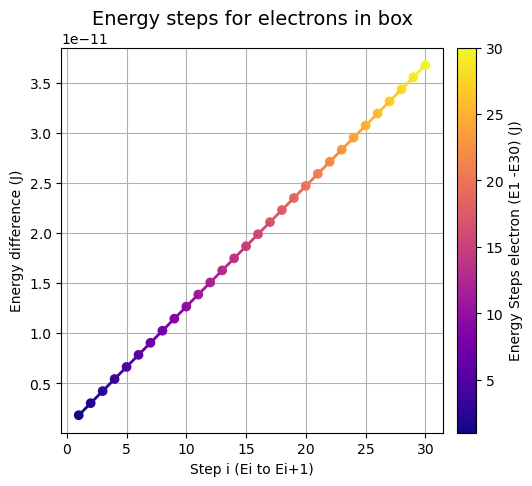

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Parameters
h = 6.626e-34 # Planck's constant (J.s)
m = 9.11e-34 # electron mass (kg)
L = 1e-11 # box size

# Quantum energy steps
i = np.linspace(1, 30, 30, dtype=int)
delta_E=(((i+1)**2 - i**2) * h**2) / (8 * m * L**2)

E1 = (1**2 * h**2) / (8 * m * L**2)
E30 = (30**2 * h**2) / (8 * m * L**2)
total_energy = sum(delta_E)
print('Total energy used (J):', f'{total_energy:.3e}')
print('Energy steps (E1-E30) (J):', f'{E1 - E30:.3e}')


# Create segments for line
points = np.array([i, delta_E]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis =1)

# colormap
fig, ax = plt.subplots(figsize=(6,5))
Lc=LineCollection(segments, cmap='plasma', linewidth=2, norm=plt.Normalize(i.min(), i.max()))
Lc.set_array(i) # color by time
ax.add_collection(Lc)
sc = ax.scatter(i, delta_E, c=i, cmap='plasma', marker='o')
ax.autoscale()

# Adding colorbar
cbar = plt.colorbar(Lc, ax=ax, pad=0.03)
cbar.set_label('Energy Steps electron (E1 -E30) (J)')

ax.set_xlabel('Step i (Ei to Ei+1)')
ax.set_ylabel('Energy difference (J)')
ax.set_title('Energy steps for electrons in box', fontsize=14)
ax.grid(True)
ax.set_axisbelow(True)
plt.show()